### Import libraries


let's start importing the libraries:

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import seaborn as sns

### Import DataFrame

and the database:

In [20]:
df=pd.read_csv(r"vgchartz-2024.csv.")

### Step 1: Preliminary Analysis

preliminar look at the database, top rows:

In [17]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


object type of each column, we have objects and floats:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


Change dtype from object to datetime

In [7]:
df['release_date']=pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['last_update']=pd.to_datetime(df['last_update'], format='%Y-%m-%d')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


we have a total of 64.016 rows and 14 columns

In [14]:
df.shape

(64016, 14)

let's extract the list of columns:

In [16]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

general statistics of each float variable  in the database: the data looks correct

In [15]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


analysis of Nan values across the database:

presence of Nan in each column

In [80]:
df.isna().any()

img             False
title           False
console         False
genre           False
publisher       False
developer        True
critic_score     True
total_sales      True
na_sales         True
jp_sales         True
pal_sales        True
other_sales      True
release_date     True
last_update      True
dtype: bool

graphical representation of total number of Nan values for each column:

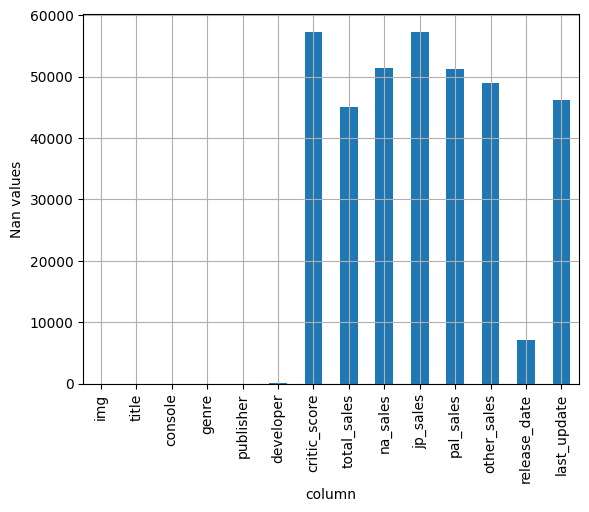

In [11]:
df.isna().sum().plot(kind="bar")
plt.xlabel("column")
plt.ylabel("Nan values")
plt.grid()
plt.show()
plt.show()

Calculate missing values as percentage: critic score and sales columns feature high percentage of missing values

In [13]:
df.isna().mean() * 100

img              0.000000
title            0.000000
console          0.000000
genre            0.000000
publisher        0.000000
developer        0.026556
critic_score    89.568233
total_sales     70.441765
na_sales        80.259623
jp_sales        89.493252
pal_sales       79.967508
other_sales     76.368408
release_date    11.014434
last_update     72.071045
dtype: float64

delete column "img" since it's not relevant to our analysis

In [21]:
df.drop(columns=["img","last_update"])

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28


### Step 2: Transforming DataFrame: filtering, sorting and grouping

Count top 10 categories "consoles, genre, publisher, developer": we see that most games are published for PC with a miscellaneous or action category. Most publishers and developers in the database are unknown

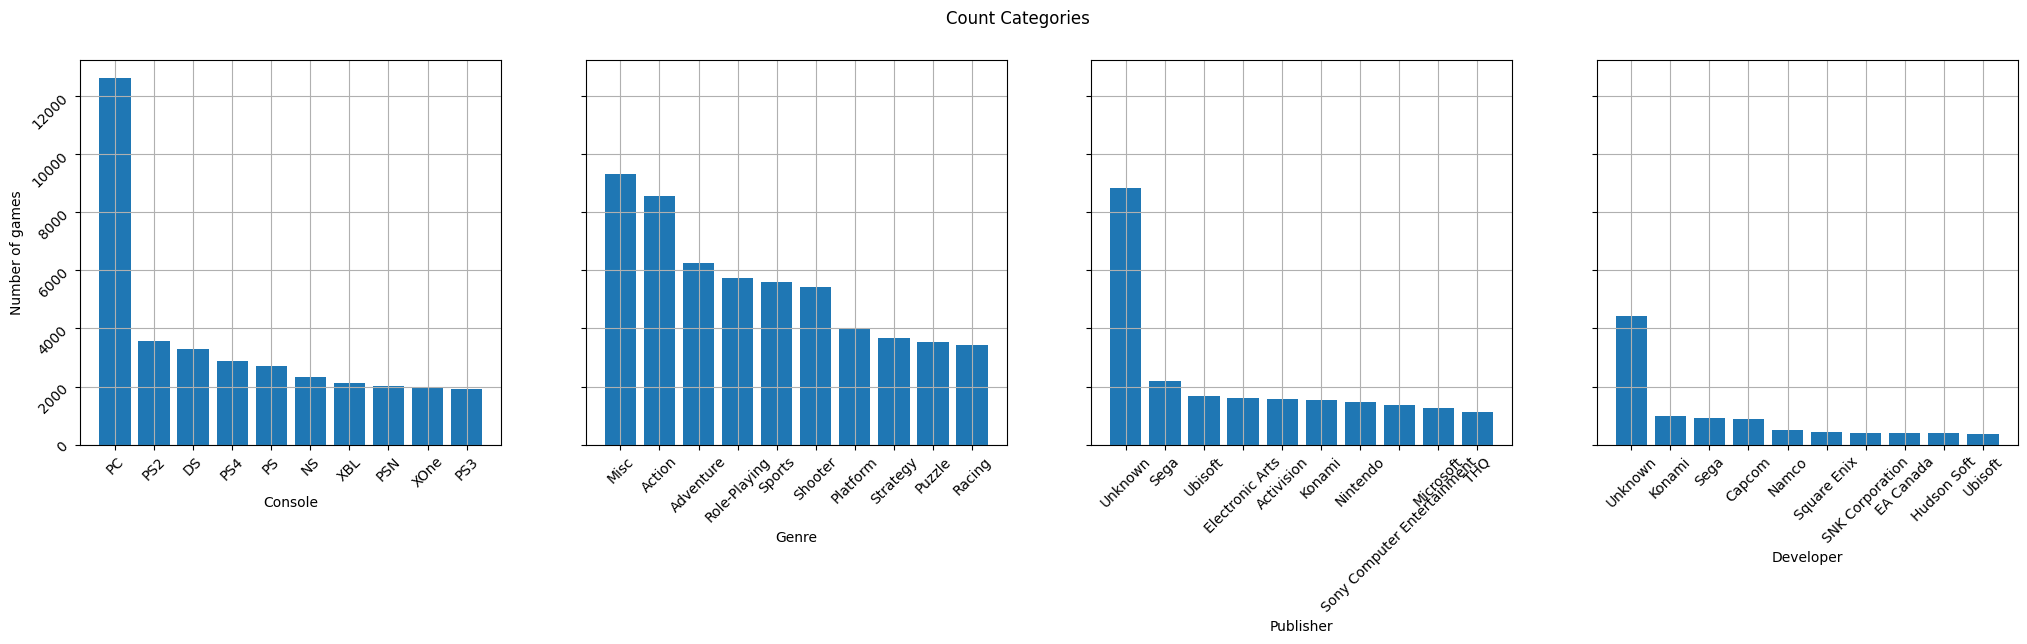

In [71]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
fig.suptitle('Count Categories')
axs[0].bar(df["console"].value_counts().head(10).index,df["console"].value_counts().head(10).values)
axs[0].set_xlabel('Console')
axs[0].set_ylabel('Number of games')
axs[1].bar(df["genre"].value_counts().head(10).index,df["genre"].value_counts().head(10).values)
axs[1].set_xlabel('Genre')
axs[2].bar(df["publisher"].value_counts().head(10).index,df["publisher"].value_counts().head(10).values)
axs[2].set_xlabel('Publisher')
axs[3].bar(df["developer"].value_counts().head(10).index,df["developer"].value_counts().head(10).values)
axs[3].set_xlabel('Developer')

for x in range(4):
  axs[x].grid()
  axs[x].tick_params(labelrotation=45)




show percentage of rows based on console, we see that PC constituites almost 13% of the database

In [90]:
df["console"].value_counts(sort=True,normalize=True)

console
PC       0.132075
X360     0.095687
PS3      0.077119
PSP      0.062294
PS2      0.057203
GBA      0.057053
PSN      0.053908
Wii      0.051962
XBL      0.049566
GC       0.049416
DS       0.047769
PS       0.040132
DC       0.036837
3DS      0.033094
PS4      0.022162
XB       0.020066
NS       0.019766
N64      0.015274
WW       0.012579
WiiU     0.012129
XOne     0.010782
VC       0.010332
NGage    0.006739
DSiW     0.006140
SNES     0.004043
GB       0.003744
SAT      0.003145
PSV      0.001797
PS5      0.001348
GBC      0.000898
XS       0.000898
NES      0.000749
SCD      0.000749
All      0.000749
iOS      0.000749
GEN      0.000449
OSX      0.000299
AJ       0.000150
Linux    0.000150
Name: proportion, dtype: float64

pring min, max and mean critic score on screen

In [106]:
print("Min of critical score: "+str(df["critic_score"].min()))
print("Max of critical score: "+str(df["critic_score"].max()))
print("Mean of critical score: "+str(df["critic_score"].mean()))

Min of critical score: 1.0
Max of critical score: 10.0
Mean of critical score: 7.220440251572328


Plot histogram and boxplot of critic score: we see that most critic score are positioned around 8

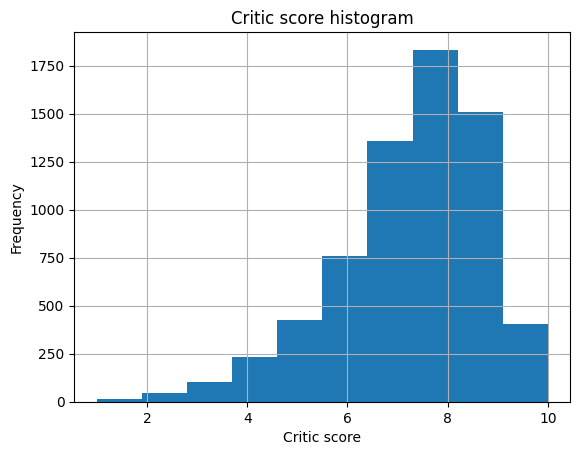

In [88]:
plt.hist(df["critic_score"],bins=10)
plt.grid()
plt.xlabel("Critic score")
plt.ylabel("Frequency")
plt.title("Critic score histogram")
 

plt.show()

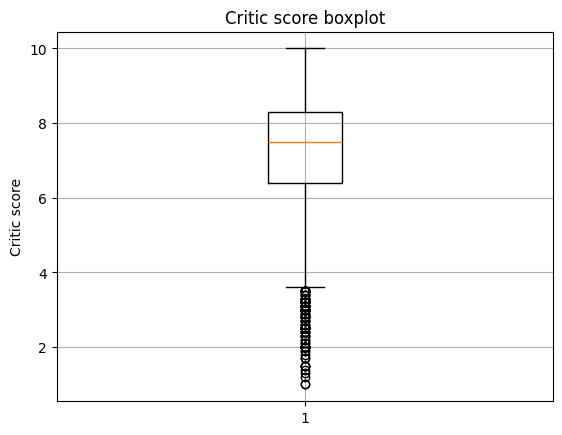

In [89]:
data=df.dropna(subset=["critic_score"])
plt.boxplot(data["critic_score"])
plt.grid()
plt.ylabel("Critic score")
plt.title("Critic score boxplot")
plt.show()

extract title, console type and critic score, sorting by critic score: Red Dead Redemption 2 for PS4 features the top critic score of 9.8

In [22]:
df.loc[0:9,["title","console","critic_score"]].sort_values("critic_score",ascending=False)

,title,console,critic_score
7,Red Dead Redemption 2,PS4,9.8
1,Grand Theft Auto V,PS4,9.7
2,Grand Theft Auto: Vice City,PS2,9.6
0,Grand Theft Auto V,PS3,9.4
6,Call of Duty: Black Ops,X360,8.8
5,Call of Duty: Modern Warfare 3,X360,8.7
8,Call of Duty: Black Ops II,X360,8.4
4,Call of Duty: Black Ops 3,PS4,8.1
9,Call of Duty: Black Ops II,PS3,8.0
3,Grand Theft Auto V,X360,NaN


show top 5 rows with critic_score>9 and console=PS2, sort by total_sales and critic_score in descending order

In [10]:
df[(df["critic_score"]>9) & (df["console"]=="PS2")].sort_values(["total_sales","critic_score"],ascending=[False,False]).head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
13,/games/boxart/3570928ccc.jpg,Grand Theft Auto III,PS2,Action,Rockstar Games,DMA Design,9.5,13.10,6.99,0.30,4.51,1.30,2001-10-23,NaN
75,/games/boxart/1473680ccc.jpg,Madden NFL 2004,PS2,Sports,EA Sports,EA Tiburon,9.5,5.23,4.26,0.01,0.26,0.71,2003-08-12,NaN
80,/games/boxart/full_2486879AmericaFrontccc.jpg,Guitar Hero II,PS2,Misc,RedOctane,Harmonix Music Systems,9.2,5.12,3.81,NaN,0.63,0.68,2006-11-07,NaN
94,/games/boxart/full_727567AmericaFrontccc.jpg,Madden NFL 06,PS2,Sports,EA Sports,EA Tiburon,9.1,4.91,3.98,0.01,0.26,0.66,2005-08-08,NaN


show top 5 rows with console=PS2 or XBOX360, and genre action, and sort them based on total_sales in descending order

In [72]:
df[(df["console"].isin(["PS2","X360"]))&(df["genre"]=="Action")].sort_values("total_sales",ascending=False).head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
13,/games/boxart/3570928ccc.jpg,Grand Theft Auto III,PS2,Action,Rockstar Games,DMA Design,9.5,13.10,6.99,0.30,4.51,1.30,2001-10-23,NaN
16,/games/boxart/full_1182151AmericaFrontccc.jpg,Grand Theft Auto IV,X360,Action,Rockstar Games,Rockstar North,10.0,11.09,6.80,0.14,3.11,1.04,2008-04-29,NaN
51,/games/boxart/full_2634795AmericaFrontccc.jpg,Red Dead Redemption,X360,Action,Rockstar Games,Rockstar San Diego,9.5,6.50,3.77,0.09,2.03,0.60,2010-05-18,NaN


group by publisher and console, and calculate total sales. We see that Activision registered best sales for the X360 and PS3 consoles

In [20]:
df.groupby(["publisher","console"])["total_sales"].sum().sort_values(ascending=False).head(10)

publisher                    console
Activision                   X360       149.47
                             PS3        121.65
EA Sports                    PS2        114.50
Electronic Arts              PS2        108.52
Sony Computer Entertainment  PS2         98.84
Electronic Arts              X360        91.37
                             PS3         86.87
Sony Computer Entertainment  PS          86.73
Activision                   PS4         84.29
                             PS2         83.57
Name: total_sales, dtype: float64

group by consoles and calculate total sales. We see that the PS2 is the best selling console in terms of games sold

In [21]:
df.groupby("console")["total_sales"].sum().sort_values(ascending=False).head(10)



console
PS2     1027.76
X360     859.79
PS3      839.70
PS       546.25
PS4      539.92
Wii      459.44
DS       458.17
XOne     268.96
PSP      245.29
XB       232.05
Name: total_sales, dtype: float64

Plot total sales and sales for each geographical area, from 1970 up to 2024: we see a peak in sales around 2008, for North America, Japan and total sales

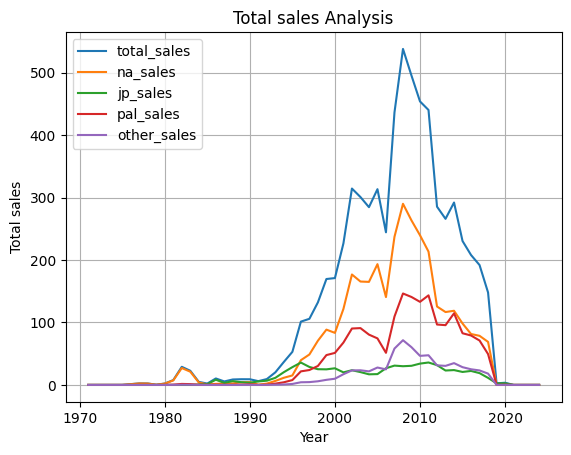

In [4]:
df["release_date"]=pd.to_datetime(df["release_date"], format='%Y-%m-%d')
data=df.groupby(df.release_date.dt.year)[["total_sales","na_sales","jp_sales","pal_sales","other_sales"]].sum()
plt.plot(data.index,data.values)
plt.xlabel("Year")
plt.ylabel("Total sales")
plt.title("Total sales Analysis")
plt.grid()
plt.legend(data.columns) 
plt.show()
plt.show()

Analyse total sales for each genre: the best selling genres are Sports, Action and Shooter

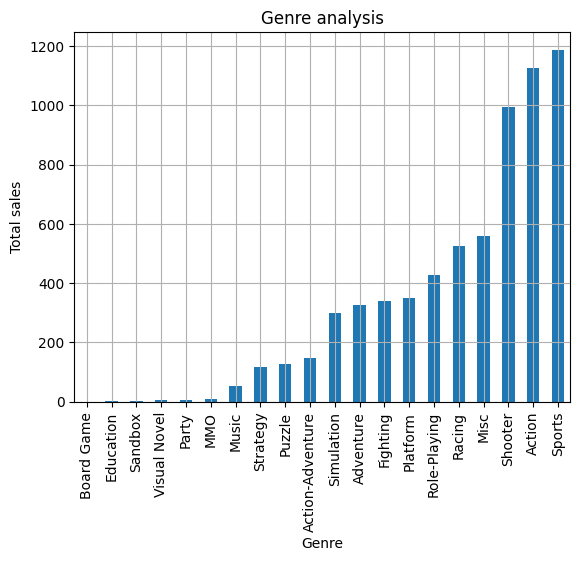

In [18]:
mean_sales=df.groupby("genre")["total_sales"].sum().sort_values()
mean_sales.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Total sales")
plt.title("Genre analysis")
plt.grid()
plt.show()

Plot total sales, north america sales and japan sales, for the top 10 publishers in terms of total sales: the publisher Activision dominates total sales and na sales

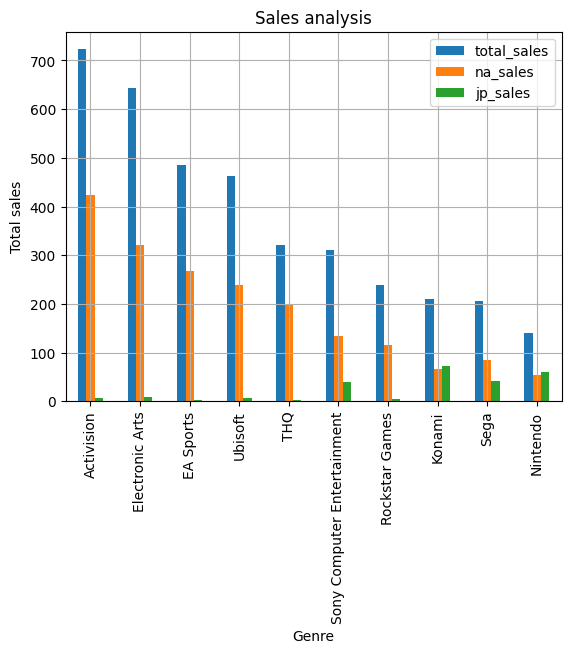

In [6]:
mean_sales=df.groupby("publisher")[["total_sales","na_sales","jp_sales"]].sum()
mean_sales=mean_sales.sort_values("total_sales",ascending=False).head(10)
mean_sales.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Total sales")
plt.title("Sales analysis")
plt.grid()
plt.show()

Compare the total sales of the top 10 publishers: top publisher is Electronic Arts, followed by EA Sports and Ubisoft

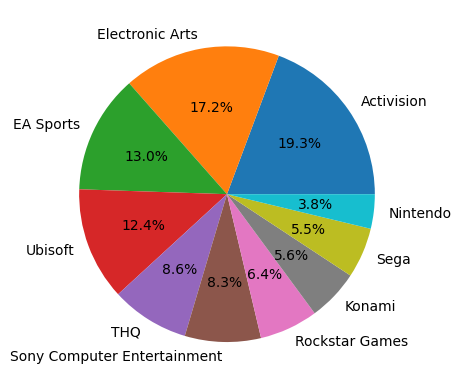

In [22]:
data=df.groupby("publisher")["total_sales"].sum().sort_values(ascending=False).head(10)

plt.pie(data,labels=data.index,autopct='%1.1f%%')
plt.show() 


Analyse the relationship between critic score and total sales

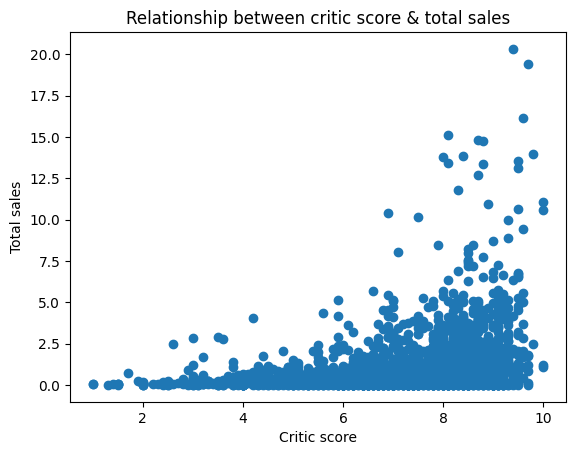

In [19]:
plt.scatter(df["critic_score"],df["total_sales"])
plt.xlabel("Critic score")
plt.ylabel("Total sales")
plt.title("Relationship between critic score & total sales")
plt.show()

let's calculate the pearson coefficient and p-value coefficient: since the p-value is <0.001, the correlation between the 2 dimensions is statistically significant, but the linear relationship is only moderate (0.32)

In [111]:
data=df.dropna(axis=0)
p_coeff,p_value=stats.pearsonr(data["critic_score"],data["total_sales"])
print("The Pearson Correlation Coefficient is", round(p_coeff,2), " with a P-value of P =", round(p_value,8))  

The Pearson Correlation Coefficient is 0.32  with a P-value of P = 6e-08
